In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [86]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [87]:
data = tf.keras.utils.image_dataset_from_directory(
    '../data/train',
    labels='inferred', # Automatically infer labels from subdirectory names
    label_mode='int', # One-hot encode the labels
    batch_size=32, # Set batch size to 32
    image_size=(256, 256), # Resize images to 256x256
    shuffle=True, # Shuffle the data
)

Found 693 files belonging to 2 classes.


In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

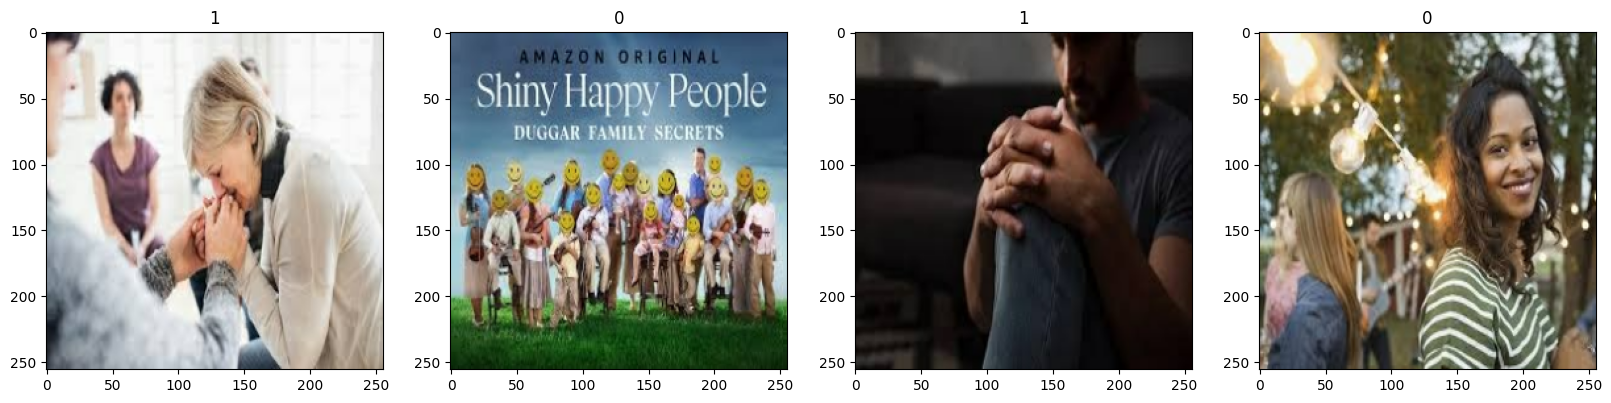

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [91]:
scaled = data.map(lambda x, y: (x / 255, y))

In [92]:
scalar_iterator = scaled.as_numpy_iterator()

In [93]:
batch = scalar_iterator.next()

In [94]:
scaled.as_numpy_iterator().next()

(array([[[[0.9529412 , 0.9647059 , 0.8901961 ],
          [0.9533778 , 0.9651425 , 0.89150584],
          [0.95686275, 0.96862745, 0.9019608 ],
          ...,
          [0.9946232 , 0.9946232 , 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ]],
 
         [[0.9529412 , 0.9647059 , 0.8901961 ],
          [0.9533778 , 0.9651425 , 0.89150584],
          [0.95686275, 0.96862745, 0.9019608 ],
          ...,
          [0.9946232 , 0.9946232 , 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ]],
 
         [[0.95298296, 0.96474767, 0.89023787],
          [0.9543783 , 0.966143  , 0.89250636],
          [0.95707166, 0.96883637, 0.9021697 ],
          ...,
          [0.99483204, 0.99483204, 0.9884442 ],
          [0.99607843, 0.99607843, 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ]],
 
         ...,
 
         [[0.2702136 , 0.12511557, 0.02031736],
          [0.29064

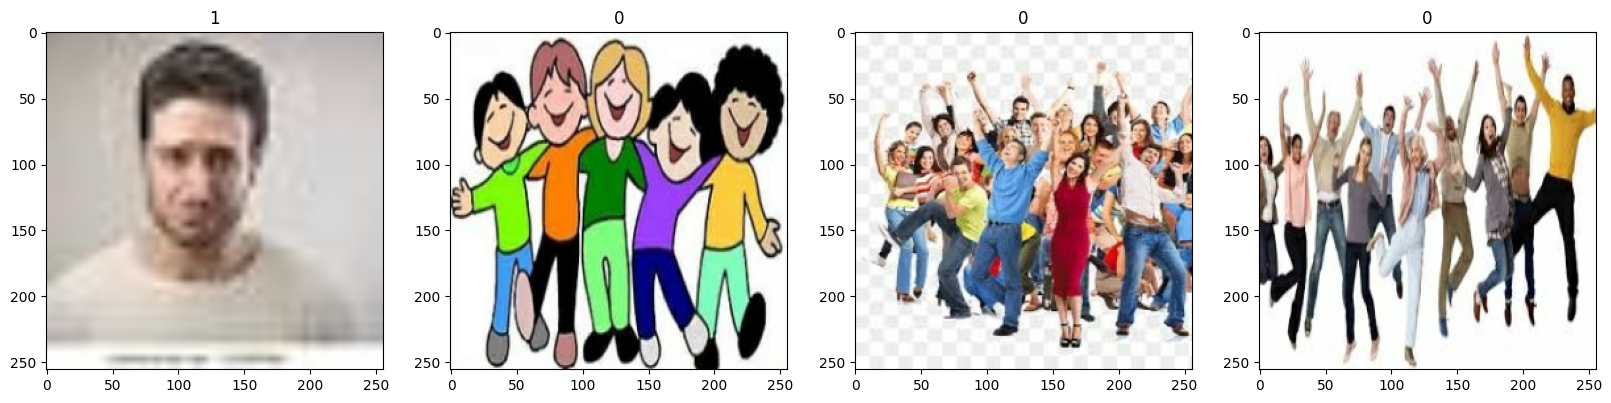

In [95]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split data

In [96]:
train_size = int(len(scaled) * 0.7)
val_size = int(len(scaled) * 0.2)
test_size = int(len(scaled) * 0.1)

In [97]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Build models

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [99]:
model = Sequential()

In [100]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\pongc\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

train

In [103]:
logdir = 'logs'

In [104]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [105]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.5297 - loss: 350.5060 - val_accuracy: 0.7031 - val_loss: 0.5639
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.7546 - loss: 0.4971 - val_accuracy: 0.8906 - val_loss: 0.3549
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8919 - loss: 0.3208 - val_accuracy: 0.8516 - val_loss: 0.3245
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9255 - loss: 0.1752 - val_accuracy: 0.9609 - val_loss: 0.1346
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9693 - loss: 0.1146 - val_accuracy: 0.9766 - val_loss: 0.0671
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9702 - loss: 0.0657 - val_accuracy: 0.9375 - val_loss: 0.2206
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9862 - loss: 0.0339 - val_accuracy: 0.9688 - val_loss: 0.0708
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9801 - loss: 0.0743 - val_accuracy: 

Evaluate

In [106]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [107]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [109]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9629629850387573, Accuracy: 0.984375


In [110]:
import cv2

In [ ]:
img = cv2.imread("../data/test/Laugh_face.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

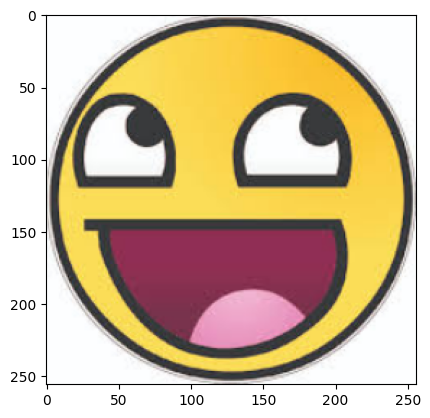

In [115]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(resize.numpy().astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()

In [118]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [119]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.4534227]], dtype=float32)

In [120]:
if yhat < 0.5:
    print("Happy")
else:
    print("Sad")

Happy
